In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 98% 770M/786M [00:17<00:00, 30.3MB/s]
100% 786M/786M [00:17<00:00, 47.9MB/s]


In [ ]:
!ls

kaggle	kaggle.json  sample_data  skin-cancer9-classesisic.zip


In [ ]:
!unzip skin-cancer9-classesisic.zip

Archive:  skin-cancer9-classesisic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer 

In [ ]:
!mkdir train

In [ ]:
import os
from tqdm import tqdm
arr=(os.listdir('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'))

for i in arr:
  path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+str(i)+'/'
  output_path = '/content/train/'
  def image_rename():
    cnt = 1
    for img in tqdm(os.listdir(path)):
      if os.path.isfile(path+img):
        filename, file_extention = os.path.splitext(path+img)
        os.rename(os.path.join(path, img), os.path.join(output_path,str(i) +str('@') + str(cnt) + file_extention))
        print()
      cnt +=1
  image_rename()

  0%|          | 0/77 [00:00<?, ?it/s]

 57%|█████▋    | 262/462 [00:00<00:00, 2616.75it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/376 [00:00<?, ?it/s]

100%|██████████| 139/139 [00:00<00:00, 2449.70it/s]

In [ ]:
image_name=(os.listdir('/content/train'))

In [ ]:
target=[]
for i in image_name:
  k=(i.split('@'))
  y=k[0]
  target.append(y)

In [ ]:
#machine learning package
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *
import warnings
warnings.filterwarnings('ignore')


In [ ]:
submission = pd.DataFrame({
        "image_name":image_name,
        "target":target
    })
submission.to_csv('./train.csv', index=False)
print(submission)

                              image_name                      target
0               actinic keratosis@68.jpg           actinic keratosis
1                       melanoma@250.jpg                    melanoma
2           basal cell carcinoma@320.jpg        basal cell carcinoma
3                       melanoma@137.jpg                    melanoma
4           basal cell carcinoma@228.jpg        basal cell carcinoma
...                                  ...                         ...
2234  pigmented benign keratosis@292.jpg  pigmented benign keratosis
2235                       nevus@316.jpg                       nevus
2236  pigmented benign keratosis@291.jpg  pigmented benign keratosis
2237                       nevus@331.jpg                       nevus
2238        basal cell carcinoma@239.jpg        basal cell carcinoma

[2239 rows x 2 columns]


In [ ]:
!mkdir test

In [ ]:
import os
from tqdm import tqdm
arr=(os.listdir('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'))

for i in arr:
  path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'+str(i)+'/'
  output_path = '/content/test/'
  def image_rename():
    cnt = 1
    for img in tqdm(os.listdir(path)):
      if os.path.isfile(path+img):
        filename, file_extention = os.path.splitext(path+img)
        os.rename(os.path.join(path, img), os.path.join(output_path,str(i) +str('@') + str(cnt) + file_extention))
        print()
      cnt +=1
  image_rename()

100%|██████████| 3/3 [00:00<00:00, 4236.67it/s]

In [ ]:
image_name=(os.listdir('/content/test'))

In [ ]:
target=[]
for i in image_name:
  k=(i.split('@'))
  y=k[0]
  target.append(y)

In [ ]:
submission = pd.DataFrame({
        "image_name":image_name,
        "target":target
    })
submission.to_csv('./test.csv', index=False)
print(submission)

                            image_name                      target
0          basal cell carcinoma@15.jpg        basal cell carcinoma
1       squamous cell carcinoma@16.jpg     squamous cell carcinoma
2                       melanoma@9.jpg                    melanoma
3       squamous cell carcinoma@15.jpg     squamous cell carcinoma
4                       melanoma@8.jpg                    melanoma
..                                 ...                         ...
113  pigmented benign keratosis@12.jpg  pigmented benign keratosis
114   pigmented benign keratosis@2.jpg  pigmented benign keratosis
115                       nevus@15.jpg                       nevus
116                       nevus@16.jpg                       nevus
117   pigmented benign keratosis@6.jpg  pigmented benign keratosis

[118 rows x 2 columns]


In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
test_real=test['target']

In [ ]:
del test['target']

In [ ]:
train.head(5)

,image_name,target
0,actinic keratosis@68.jpg,actinic keratosis
1,melanoma@250.jpg,melanoma
2,basal cell carcinoma@320.jpg,basal cell carcinoma
3,melanoma@137.jpg,melanoma
4,basal cell carcinoma@228.jpg,basal cell carcinoma


In [ ]:
test.head(4)

,image_name
0,basal cell carcinoma@15.jpg
1,squamous cell carcinoma@16.jpg
2,melanoma@9.jpg
3,squamous cell carcinoma@15.jpg


In [ ]:
path= '/content/train'
k= '/content/train.csv'
p ='/content/test.csv'

In [ ]:
path= '/content/train/'
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '../train.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=224)
        .databunch(num_workers=0,bs=8))

In [ ]:
val=data.classes
print(val)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


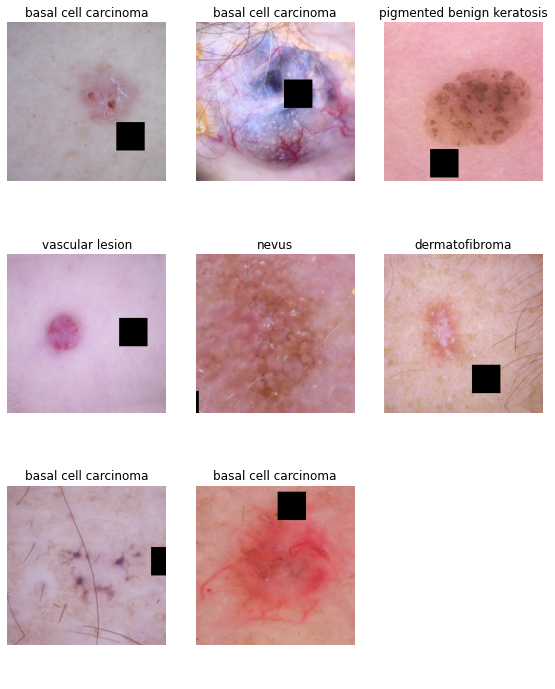

In [ ]:
## to see the images in train with there labels
data.show_batch(rows=3, figsize=(8,10))

In [ ]:
## print the target classes
print(data.classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [ ]:

from fastai import *
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import shutil
from sklearn.metrics import f1_score, confusion_matrix

np.random.seed(1786)
ROOT = "/tmp/data1"

In [ ]:

def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

In [ ]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss):
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [ ]:
#Path(ROOT).mkdir(exist_ok=True, parents=True)
src1 = "/content"
shutil.copytree(src1, ROOT)


if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=12345786).split(train_df, train_df.target))
    
    tfms1 = get_transforms(max_zoom=2.0)
    test_preds_all = []
    val_preds_all = []
    for i in range(2):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT, folder="train").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=3).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="test"))
        learn = cnn_learner(data, models.resnet152, metrics=accuracy, ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(4)
        learn.unfreeze()
        learn.fit_one_cycle(3, max_lr=1e-4, callbacks=[cb])
        #learn.fit_one_cycle(2, max_lr=5e-5, callbacks=[cb])
        #learn.fit_one_cycle(1, max_lr=1e-5, callbacks=[cb])
        #learn.fit_one_cycle(1, max_lr=5e-6, callbacks=[cb])
        #learn.fit_one_cycle(2, max_lr=1e-6, callbacks=[cb])
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
        shutil.copy(src, fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)

    np.save("test_preds.npy", test_preds_all)
    np.save("val_preds.npy", val_preds_all)

(2239, 2) (118, 2)
Starting fold 0
(2099,) (140,)


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.259331,2.346918,0.442857,01:42
1,1.680394,1.462834,0.585714,01:39
2,1.332537,1.120743,0.607143,01:39
3,1.069840,1.061769,0.592857,01:41


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,1.055060,1.072468,0.671429,01:56
1,0.985949,0.825300,0.685714,01:56
2,0.759495,0.818645,0.721429,01:56


Save the best acc 0.67143
Save the best acc 0.68571
Save the best acc 0.72143


F1 score for this fold  0.7051740955070708


Starting fold 1
(2099,) (140,)


epoch,train_loss,valid_loss,accuracy,time
0,2.243898,2.407732,0.471429,01:40
1,1.693493,1.300601,0.592857,01:40
2,1.327766,1.137895,0.585714,01:40
3,1.129733,1.158320,0.678571,01:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,1.032286,1.260475,0.614286,01:55
1,1.002970,1.003550,0.671429,01:56
2,0.818103,0.798716,0.685714,01:54


Save the best acc 0.61429
Save the best acc 0.67143
Save the best acc 0.68571


F1 score for this fold  0.7123052023812508


In [ ]:
x = np.argmax(test_preds_all, axis=1)
x

array([1, 5, 3, 7, ..., 5, 5, 4, 5])

In [ ]:
f=[]
for i in x:
  f.append(val[i])

In [ ]:
submission = pd.DataFrame({
        "Filename":test['image_name'],
        "Labels":f
    })
submission.to_csv('./dseo.csv', index=False)
print(submission)

                              Filename                      Labels
0          basal cell carcinoma@15.jpg        basal cell carcinoma
1       squamous cell carcinoma@16.jpg  pigmented benign keratosis
2                       melanoma@9.jpg                    melanoma
3       squamous cell carcinoma@15.jpg     squamous cell carcinoma
4                       melanoma@8.jpg  pigmented benign keratosis
..                                 ...                         ...
113  pigmented benign keratosis@12.jpg  pigmented benign keratosis
114   pigmented benign keratosis@2.jpg  pigmented benign keratosis
115                       nevus@15.jpg  pigmented benign keratosis
116                       nevus@16.jpg                       nevus
117   pigmented benign keratosis@6.jpg  pigmented benign keratosis

[118 rows x 2 columns]
